# 第10章: グラフの可視化

## 学習目標
- 様々なレイアウトアルゴリズムを理解する
- ノードとエッジのスタイルをカスタマイズする
- 効果的な可視化ができる

## 難易度: 中級

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams['font.sans-serif'] = ['IPAexGothic'] + plt.rcParams['font.sans-serif']
import numpy as np
%matplotlib inline

---
## 10.1 レイアウトアルゴリズム

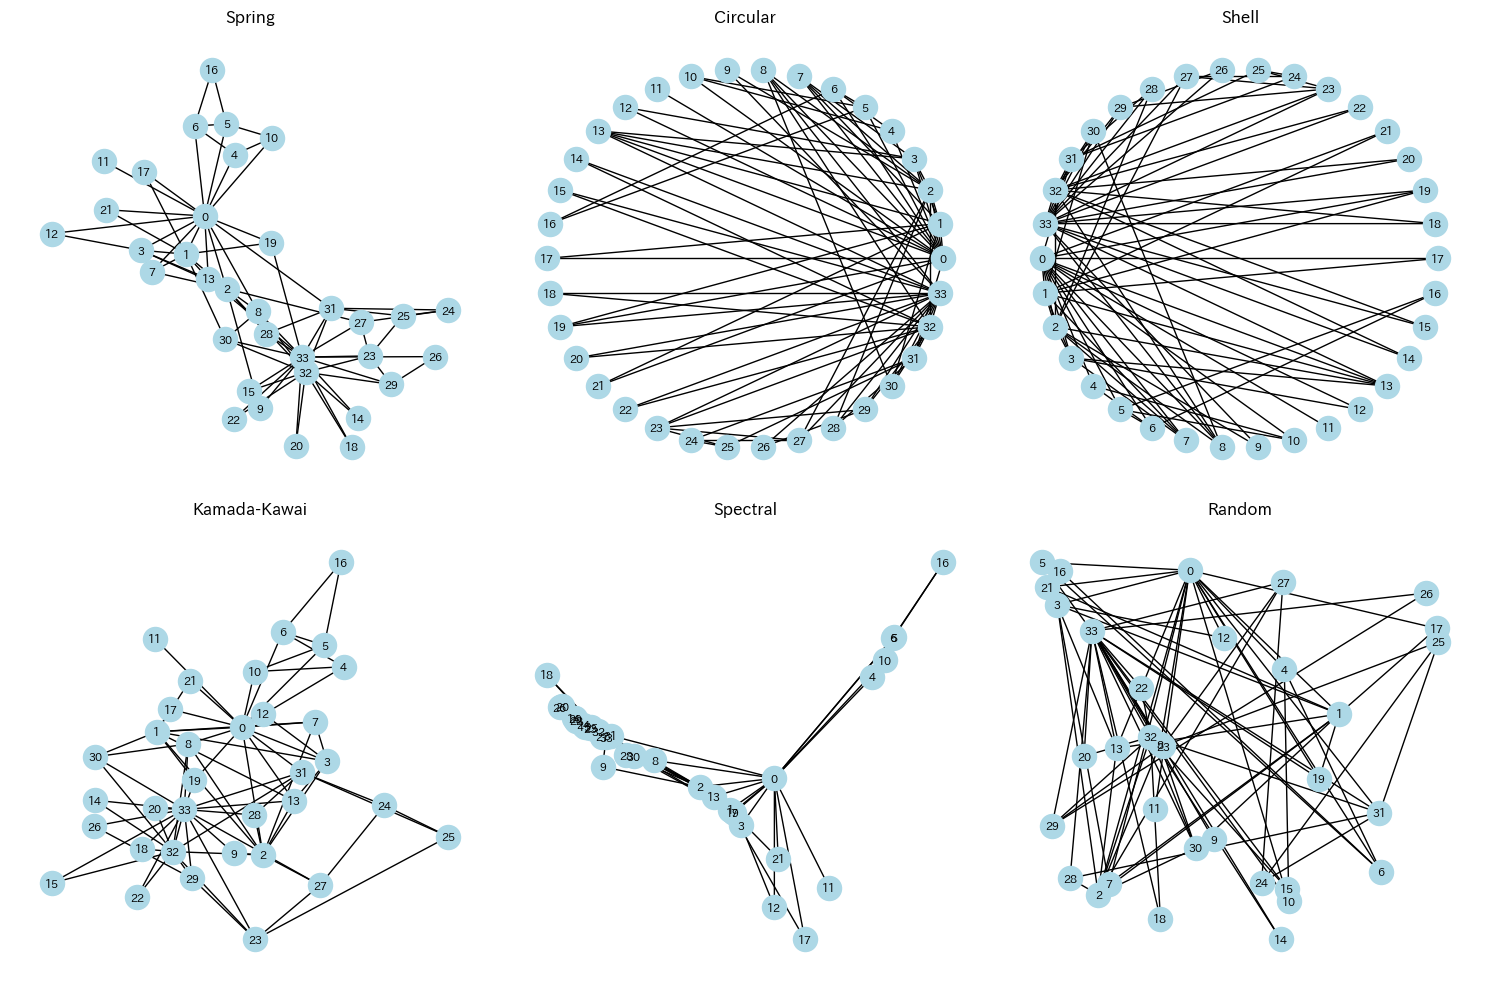

In [2]:
# サンプルグラフ
G = nx.karate_club_graph()

# 様々なレイアウト
layouts = {
    'Spring': nx.spring_layout(G, seed=42),
    'Circular': nx.circular_layout(G),
    'Shell': nx.shell_layout(G),
    'Kamada-Kawai': nx.kamada_kawai_layout(G),
    'Spectral': nx.spectral_layout(G),
    'Random': nx.random_layout(G, seed=42)
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, (name, pos) in zip(axes.flatten(), layouts.items()):
    nx.draw(G, pos, ax=ax, with_labels=True, node_size=300,
            node_color='lightblue', font_size=8)
    ax.set_title(name)

plt.tight_layout()
plt.show()

### 10.1.1 Spring Layout のパラメータ

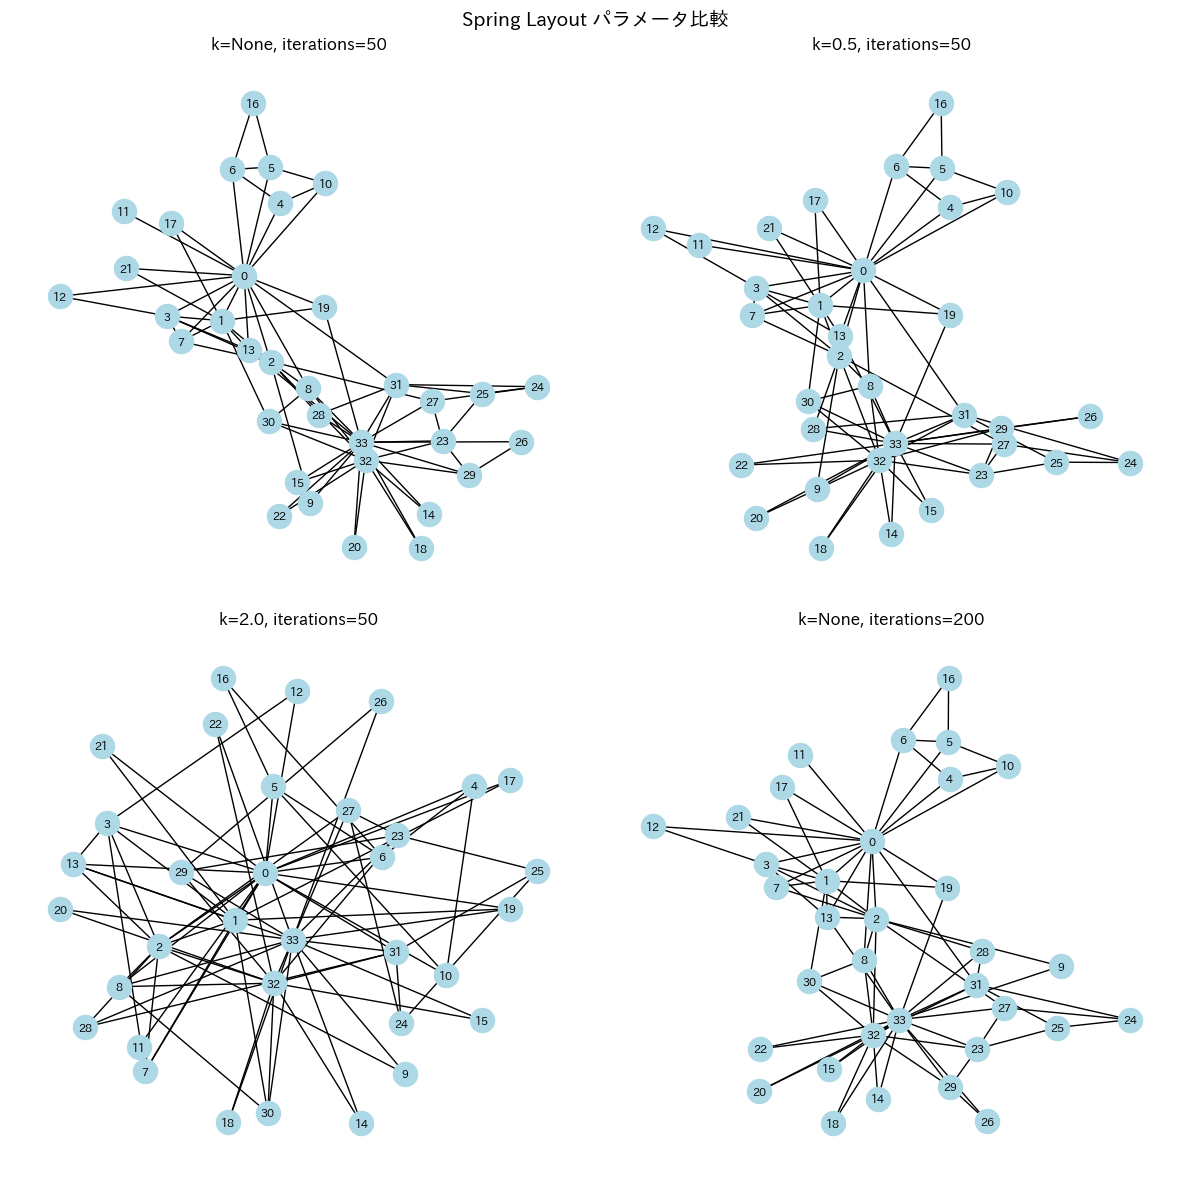

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

params = [
    {'k': None, 'iterations': 50},
    {'k': 0.5, 'iterations': 50},
    {'k': 2.0, 'iterations': 50},
    {'k': None, 'iterations': 200}
]

for ax, p in zip(axes.flatten(), params):
    pos = nx.spring_layout(G, seed=42, **p)
    nx.draw(G, pos, ax=ax, with_labels=True, node_size=300, node_color='lightblue', font_size=8)
    ax.set_title(f"k={p['k']}, iterations={p['iterations']}")

plt.suptitle('Spring Layout パラメータ比較', fontsize=14)
plt.tight_layout()
plt.show()

---
## 10.2 ノードのカスタマイズ

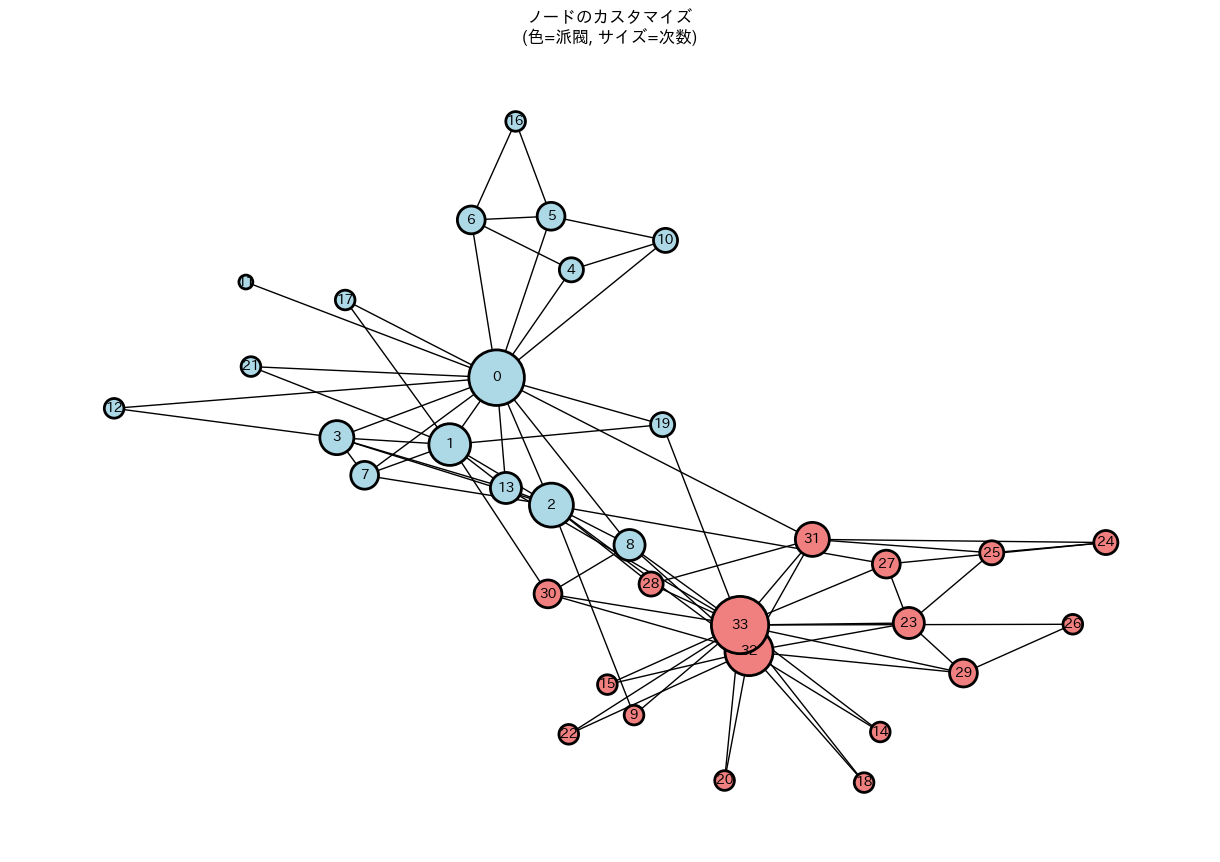

In [4]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)

# 属性に基づいた色分け
clubs = nx.get_node_attributes(G, 'club')
colors = ['lightblue' if clubs[n] == 'Mr. Hi' else 'lightcoral' for n in G.nodes()]

# 次数に基づいたサイズ
sizes = [G.degree(n) * 100 for n in G.nodes()]

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True,
        node_color=colors,
        node_size=sizes,
        font_size=10,
        font_weight='bold',
        edgecolors='black',
        linewidths=2)

plt.title("ノードのカスタマイズ\n(色=派閥, サイズ=次数)")
plt.show()

### 10.2.1 カラーマップの使用

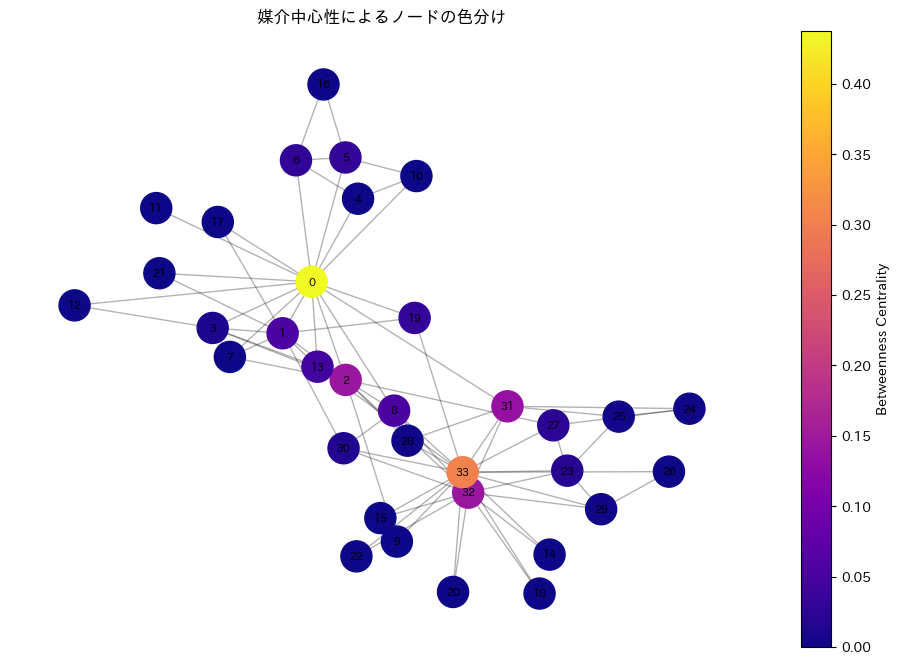

In [5]:
# 中心性に基づいた色
centrality = nx.betweenness_centrality(G)

plt.figure(figsize=(12, 8))

nodes = nx.draw_networkx_nodes(G, pos,
                               node_color=list(centrality.values()),
                               node_size=500,
                               cmap=plt.cm.plasma)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.colorbar(nodes, label='Betweenness Centrality')
plt.title("媒介中心性によるノードの色分け")
plt.axis('off')
plt.show()

---
## 10.3 エッジのカスタマイズ

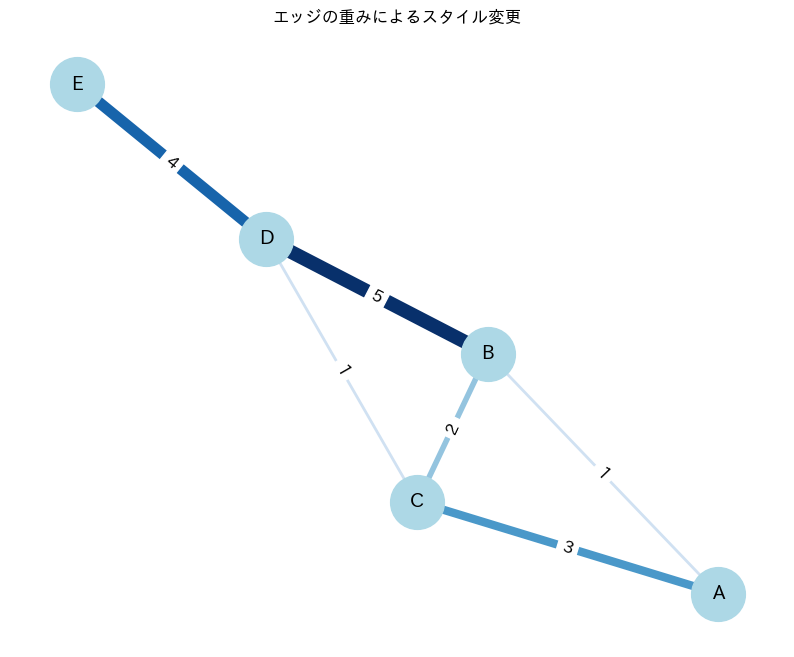

In [6]:
# 重み付きグラフ
G = nx.Graph()
edges = [
    ('A', 'B', 1), ('A', 'C', 3), ('B', 'C', 2),
    ('B', 'D', 5), ('C', 'D', 1), ('D', 'E', 4)
]
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G, seed=42)

# 重みに基づいたエッジの太さ
weights = [G[u][v]['weight'] for u, v in G.edges()]

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500)
nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

# エッジを太さと色でカスタマイズ
nx.draw_networkx_edges(G, pos,
                       width=[w * 2 for w in weights],
                       edge_color=weights,
                       edge_cmap=plt.cm.Blues,
                       edge_vmin=0,
                       edge_vmax=max(weights))

# エッジラベル
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("エッジの重みによるスタイル変更")
plt.axis('off')
plt.show()

---
## 10.4 有向グラフの可視化

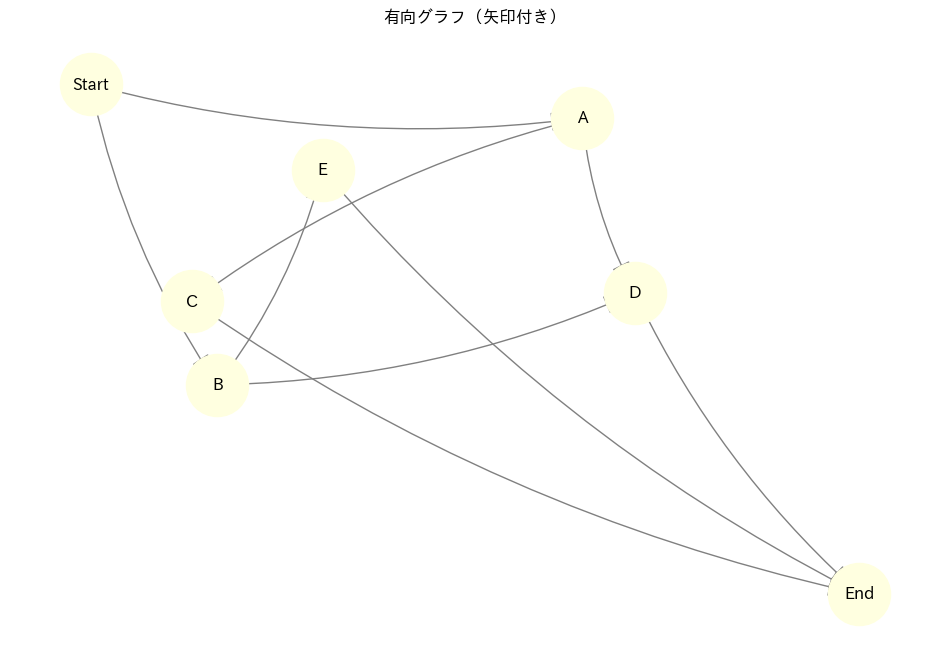

In [7]:
DG = nx.DiGraph()
DG.add_edges_from([
    ('Start', 'A'), ('Start', 'B'),
    ('A', 'C'), ('A', 'D'),
    ('B', 'D'), ('B', 'E'),
    ('C', 'End'), ('D', 'End'), ('E', 'End')
])

pos = nx.spring_layout(DG, seed=42)

plt.figure(figsize=(12, 8))

# 異なる矢印スタイル
nx.draw_networkx_nodes(DG, pos, node_color='lightyellow', node_size=2000)
nx.draw_networkx_labels(DG, pos, font_size=12, font_weight='bold')

nx.draw_networkx_edges(DG, pos,
                       arrows=True,
                       arrowsize=30,
                       arrowstyle='-|>',
                       edge_color='gray',
                       connectionstyle='arc3,rad=0.1')

plt.title("有向グラフ（矢印付き）")
plt.axis('off')
plt.show()

---
## 10.5 サブプロットと複数グラフ

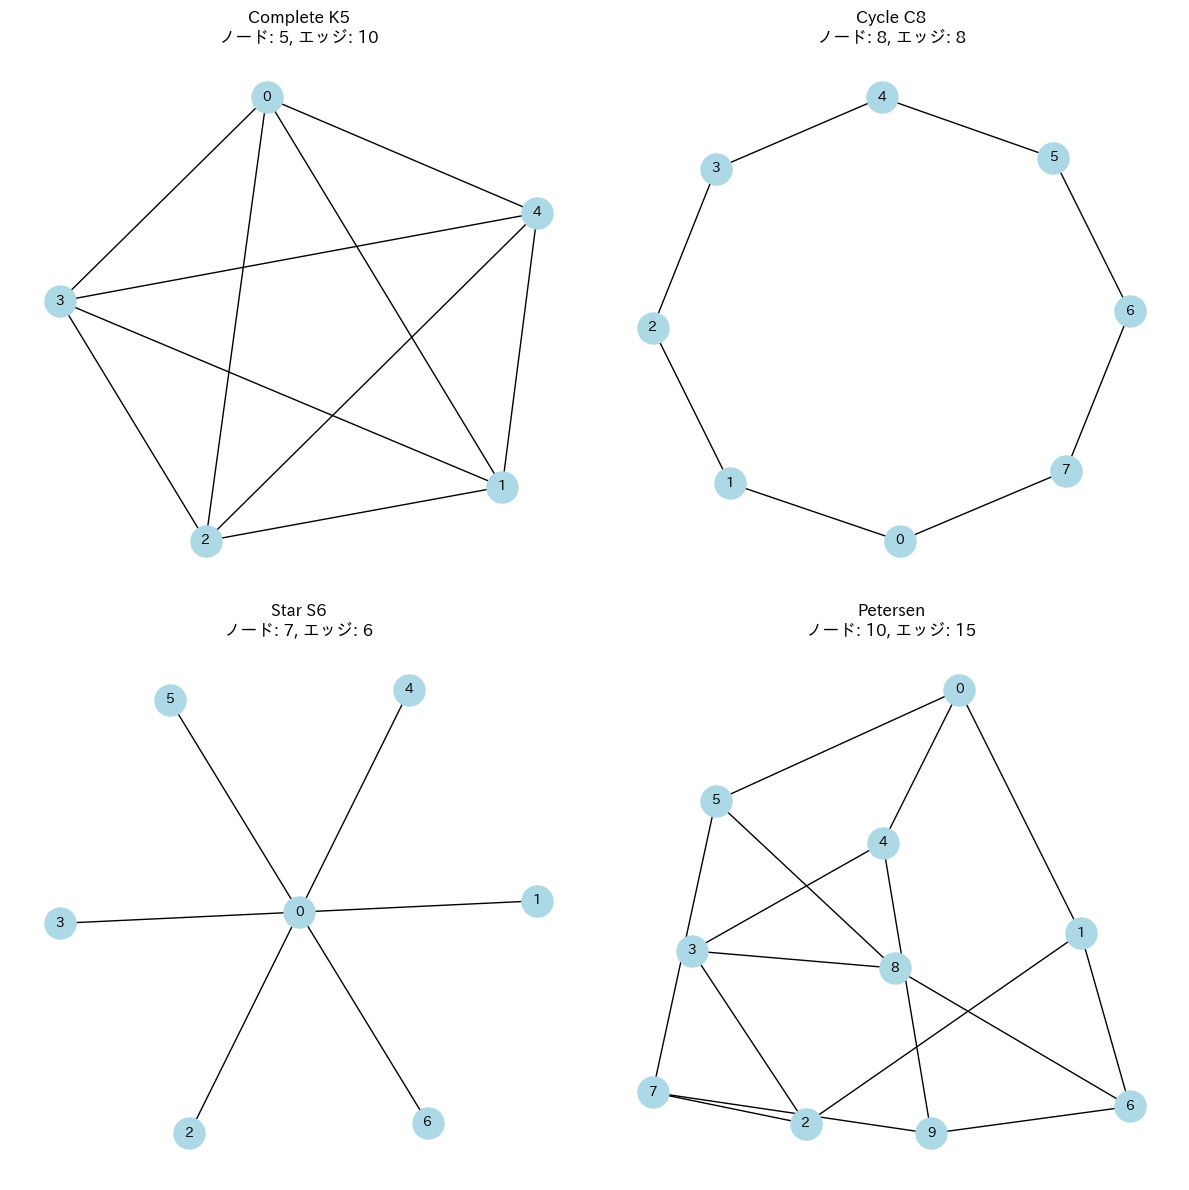

In [8]:
# 複数のグラフを比較
graphs = {
    'Complete K5': nx.complete_graph(5),
    'Cycle C8': nx.cycle_graph(8),
    'Star S6': nx.star_graph(6),
    'Petersen': nx.petersen_graph()
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (name, G) in zip(axes.flatten(), graphs.items()):
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=ax, with_labels=True,
            node_color='lightblue', node_size=500, font_size=10)
    ax.set_title(f"{name}\nノード: {G.number_of_nodes()}, エッジ: {G.number_of_edges()}")

plt.tight_layout()
plt.show()

---
## 例題: 効果的な可視化

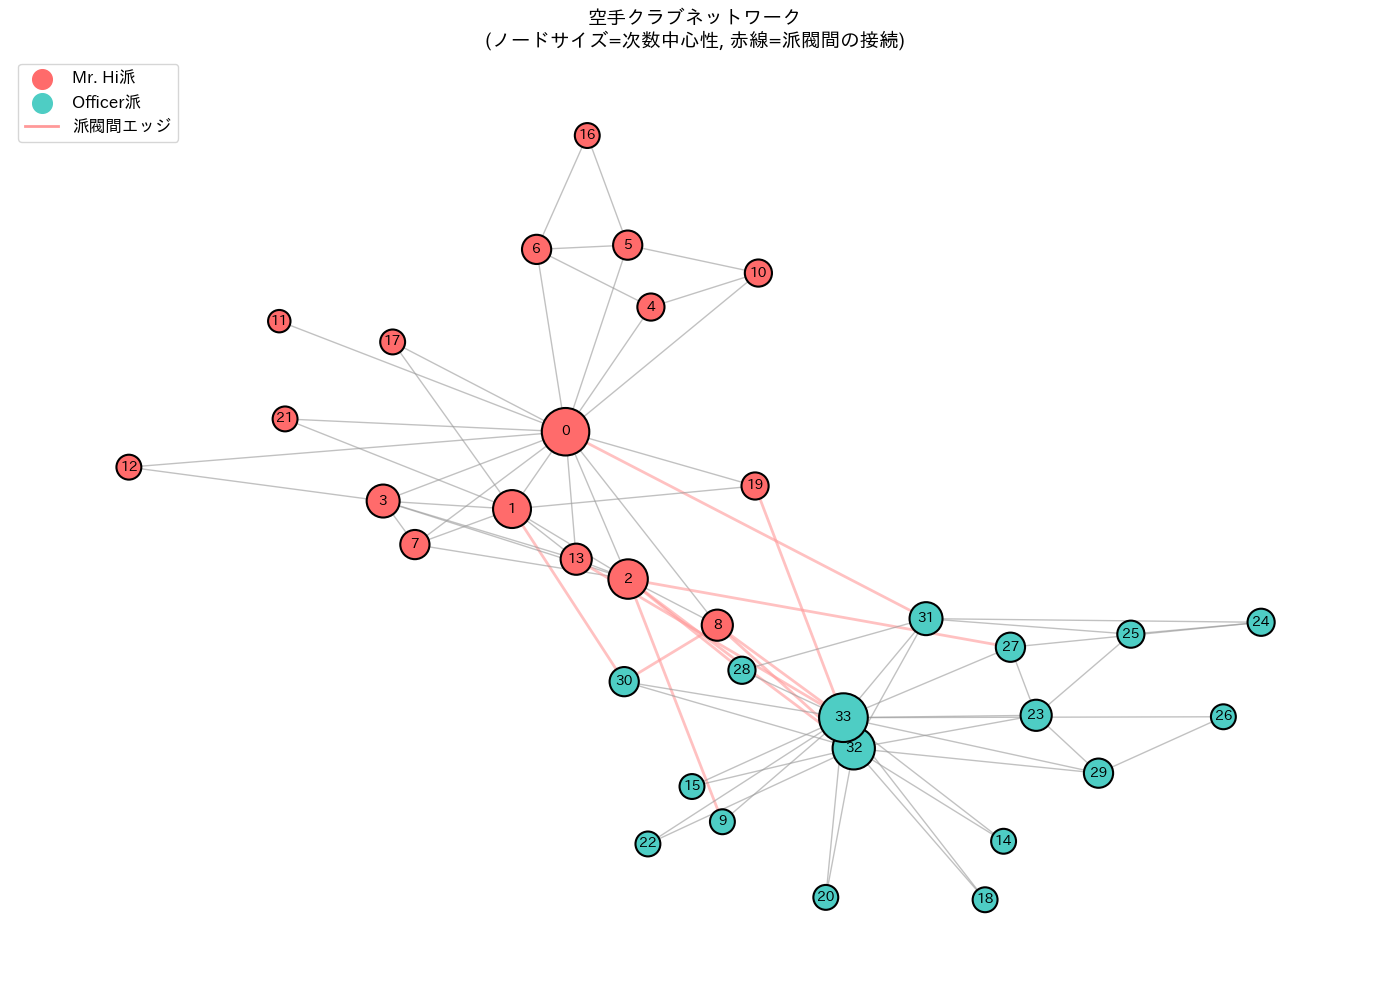

In [9]:
# 完全な可視化例
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)

# 各種指標を計算
clubs = nx.get_node_attributes(G, 'club')
degree_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)

# プロット設定
plt.figure(figsize=(14, 10))

# ノードの色（派閥）
colors = ['#ff6b6b' if clubs[n] == 'Mr. Hi' else '#4ecdc4' for n in G.nodes()]

# ノードのサイズ（次数中心性）
sizes = [degree_centrality[n] * 2000 + 200 for n in G.nodes()]

# エッジの色（派閥間/内）
edge_colors = ['#999999' if clubs[u] == clubs[v] else '#ff9999' for u, v in G.edges()]
edge_widths = [1 if clubs[u] == clubs[v] else 2 for u, v in G.edges()]

# 描画
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.6)
nodes = nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes,
                               edgecolors='black', linewidths=1.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# 凡例
plt.scatter([], [], c='#ff6b6b', s=200, label='Mr. Hi派')
plt.scatter([], [], c='#4ecdc4', s=200, label='Officer派')
plt.plot([], [], c='#ff9999', linewidth=2, label='派閥間エッジ')
plt.legend(loc='upper left', fontsize=12)

plt.title('空手クラブネットワーク\n(ノードサイズ=次数中心性, 赤線=派閥間の接続)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

---
## 練習問題

### 練習問題1: カスタム可視化

BAグラフ（100ノード、m=3）を作成し、以下の条件で可視化してください：
- ノードサイズ: 次数に比例
- ノードの色: PageRankに基づくカラーマップ
- 上位5ノードにラベルを表示

In [10]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# BAグラフの生成
G = nx.barabasi_albert_graph(100, 3, seed=42)
pos = nx.spring_layout(G, seed=42)

# 指標の計算
degrees = dict(G.degree())
pagerank = nx.pagerank(G)

# 上位5ノード
top5 = sorted(pagerank, key=pagerank.get, reverse=True)[:5]

plt.figure(figsize=(14, 10))

# ノード描画
sizes = [degrees[n] * 50 for n in G.nodes()]
colors = [pagerank[n] for n in G.nodes()]

nodes = nx.draw_networkx_nodes(G, pos,
                               node_size=sizes,
                               node_color=colors,
                               cmap=plt.cm.YlOrRd)
nx.draw_networkx_edges(G, pos, alpha=0.2)

# 上位5ノードのみラベル表示
labels = {n: str(n) for n in top5}
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_weight='bold')

plt.colorbar(nodes, label='PageRank')
plt.title('Barabási-Albert Graph\n(サイズ=次数, 色=PageRank, ラベル=上位5)', fontsize=14)
plt.axis('off')
plt.show()
```
</details>

---
## 10.6 章のまとめ

この章では以下を学びました：

1. **レイアウトアルゴリズム**: Spring, Circular, Shell, Kamada-Kawai
2. **ノードのカスタマイズ**: 色、サイズ、ラベル
3. **エッジのカスタマイズ**: 太さ、色、矢印
4. **カラーマップ**: 数値データの可視化
5. **効果的な可視化**: 複数の情報を組み合わせた表現

### 次章の予告
次章では、グラフデータの入出力について学びます。